In [162]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

Determine whether or not we are using train or test data

In [163]:
train = True

if train:
    path = test_path = os.path.abspath('../dataset/nyu_hand_dataset_v2/dataset/test/')
else:
    path = train_path = os.path.abspath('../dataset/nyu_hand_dataset_v2/dataset/train/')

Load the data annotations for the data

In [178]:
data = sio.loadmat(os.path.join(path, 'joint_data.mat'))
joint_names = data['joint_names']
joint_uvd = data['joint_uvd']
joint_xyz = data['joint_xyz']

Generate format strings for the different types of images

In [179]:
depth_format = 'depth_{k}_{f:07d}.png'
synth_depth_format = 'synthdepth_{k}_{f:07d}.png'
rgb_format = 'rgb_{k}_{f:07d}.png'

Use format strings along with indices to generate the image file names.

In [183]:
image_index = 3 # range from 1 - 3 max is (np.size(joint_uvd, 0))
kinect_index = 1 # range from 1 - 8252 max is (np.size(joint_uvd, 1))
depth_string = depth_format.format(k = kinect_index, f=image_index)
synth_depth_string = synth_depth_format.format(k = kinect_index, f=image_index)
rgb_string = rgb_format.format(k = kinect_index, f=image_index)

In [181]:
n = np.size(jnt_uvd,0) # number of joints
jnt_uvd = np.squeeze(joint_uvd[image_index - 1, kinect_index - 1, :, :]) # joint u, v, depth data
jnt_scales = 20 *np.ones(n)
jnt_colors = np.arange(n); # random colors

<IPython.core.display.Javascript object>


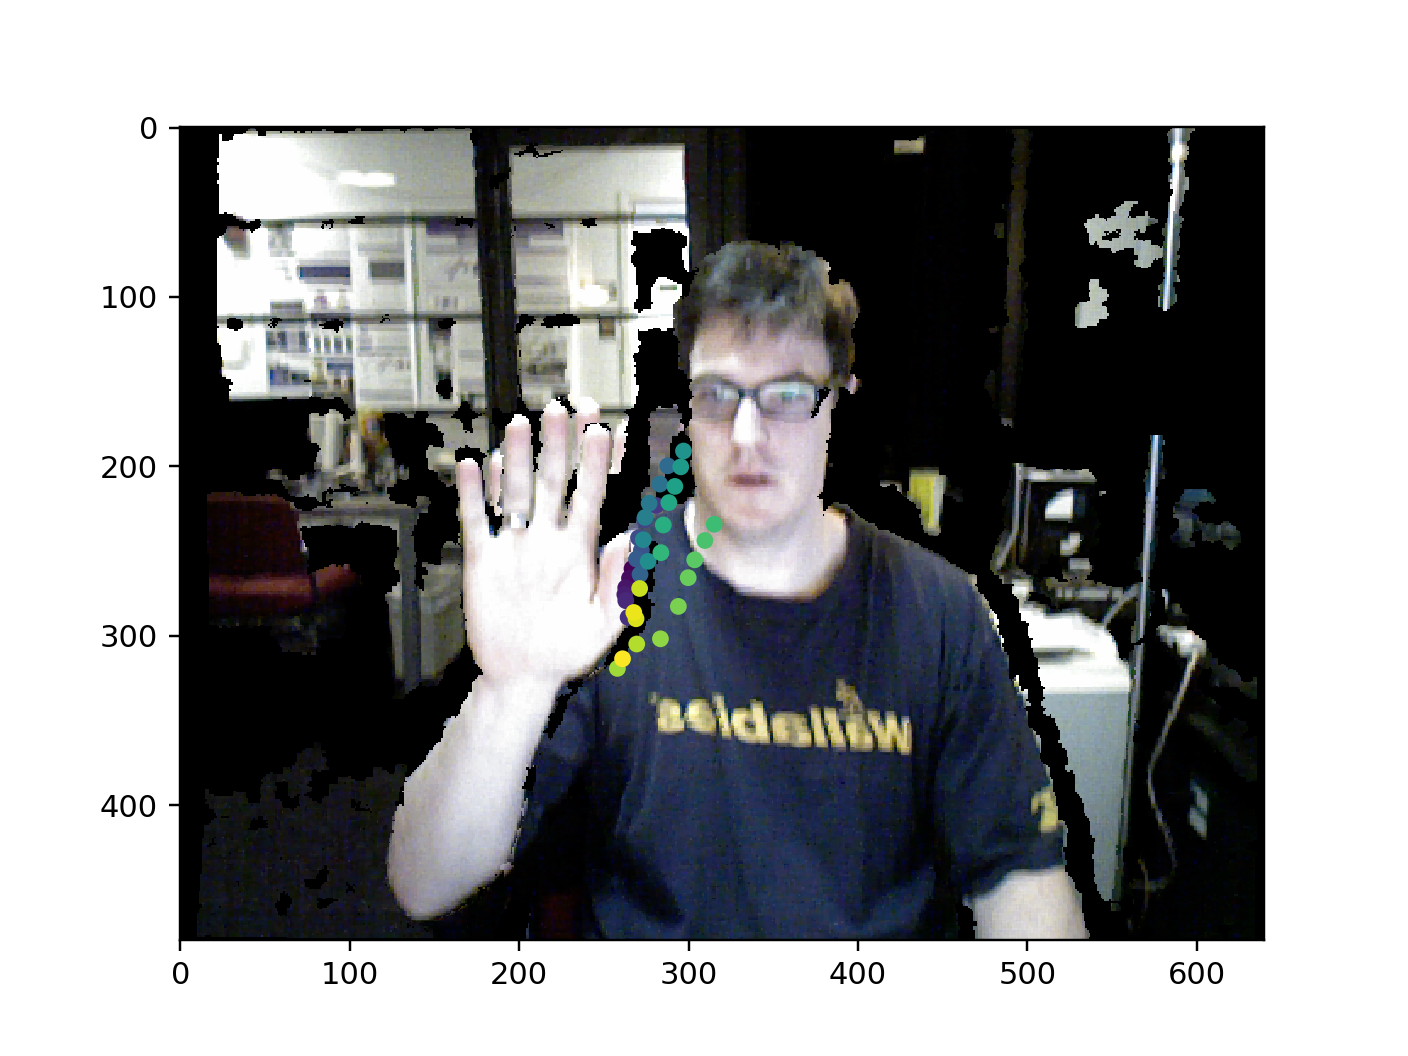

In [182]:
plt.imshow(rgb) # display the image
# display the x, y, scale, and color of joints 
plt.scatter(x=jnt_uvd[:, 0], y=jnt_uvd[:, 1], s = jnt_scales, c = jnt_colors)
plt.show()

In [170]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


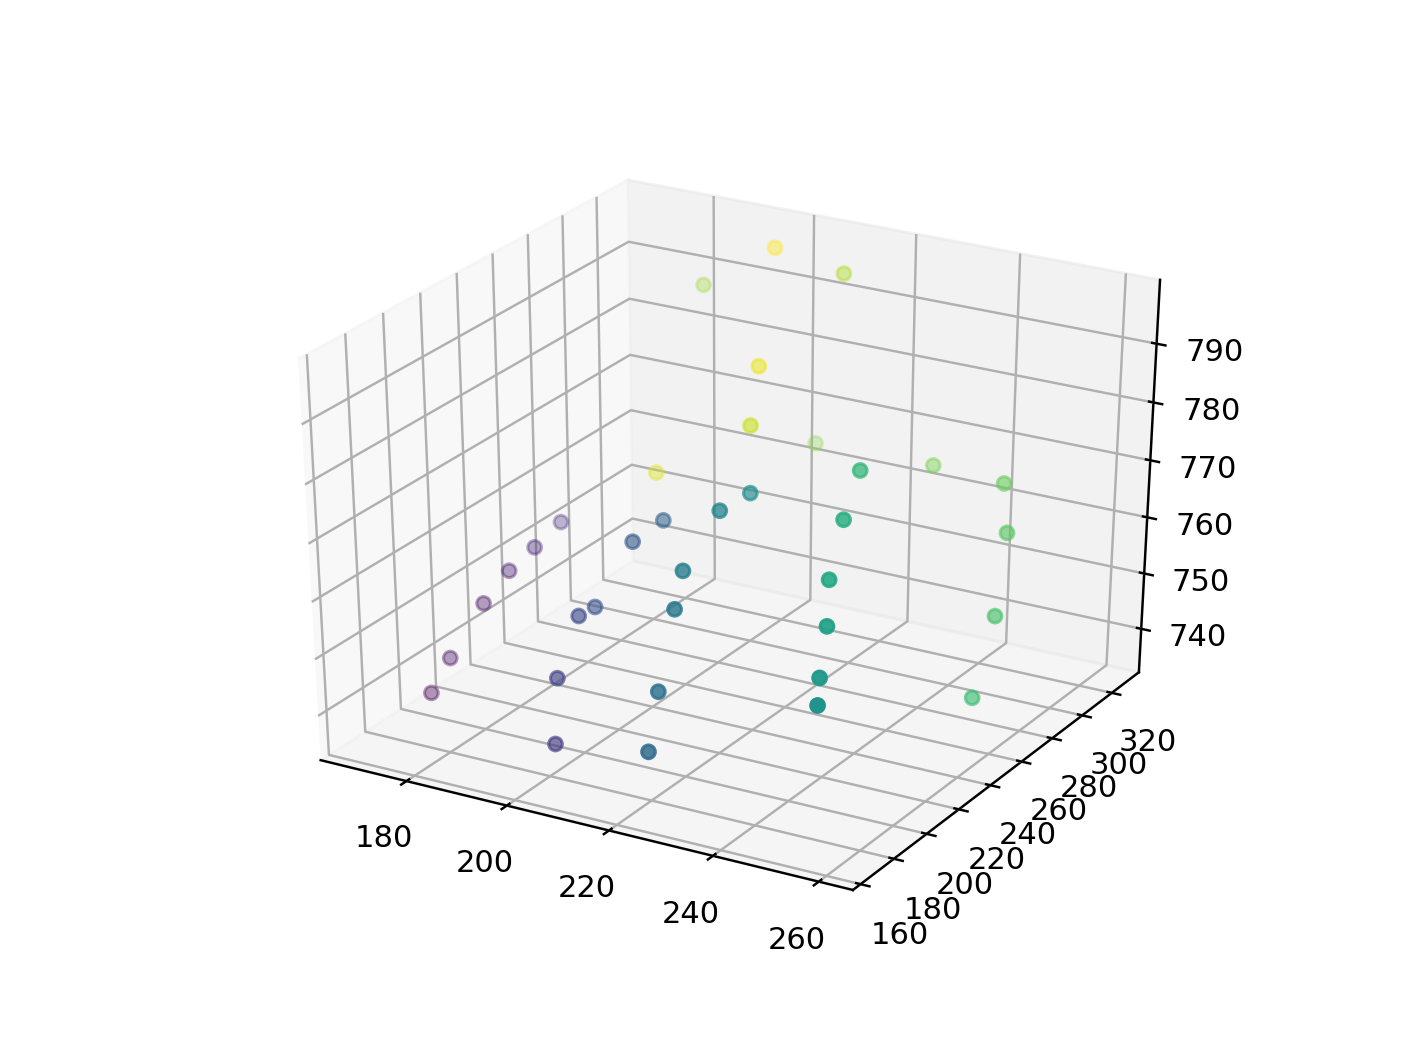

In [159]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=jnt_uvd[:, 0], ys=jnt_uvd[:, 1], zs = jnt_uvd[:, 2], s = jnt_scales, c = jnt_colors)